In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

# Part A: Decision Trees with Information Gain (Mushroom Dataset) 

## A1. Dataset Preparation

### 1. Load Dataset

In [112]:
mush_df = pd.read_csv("mushrooms.csv")

mush_df.drop('veil-type', axis=1, inplace=True)
# axis=1: indicates that we are dropping a column
# inplace=True: modifies the DataFrame directly without needing to reassign it.

mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### 2. Data Handling 

#### a. Missing Values

In [113]:
print(len(mush_df))

8124


In [114]:
num_missing_cells= int(mush_df.isna().sum().sum() + (mush_df == "?").sum().sum()) 
#first .sum() counts missing values in each column
# second .sum() adds the total count across all columns
print(num_missing_cells)

2480


In [115]:
mush_df = mush_df.replace('?', np.nan).dropna()

print(len(mush_df))

5644


#### b. Duplicate Values 

In [116]:
print("Number of Duplicates Before Dropping:\n", mush_df.duplicated().sum())

# Remove duplicates
mush_df = mush_df.drop_duplicates()

print("Number of Duplicates After Dropping:\n", mush_df.duplicated().sum())

Number of Duplicates Before Dropping:
 0
Number of Duplicates After Dropping:
 0


In [117]:
mush_df_encoded = mush_df.copy()
print(len(mush_df_encoded))
mush_df_encoded.head()

5644


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


### 3. Encode Categorical Variables as needed 

In [118]:
# Initialize LabelEncoder.
le = LabelEncoder() # Create an instance of LabelEncoder

# Get the list of all columns to be encoded.
cols_to_encode = mush_df_encoded.columns.tolist() # Get all column names

# Apply Label Encoding to each column.
for col in cols_to_encode:
    mush_df_encoded[col] = le.fit_transform(mush_df_encoded[col]) # apply label encoding

mush_df_encoded.head()

# poisonous = 2, edible = 1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,2,5,5,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,2,5,5,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,2,5,5,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,2,5,5,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,2,5,5,0,1,0,2,0,1


In [119]:
Y_uncoded = mush_df['class'] # Target 
X_uncoded = mush_df.drop('class', axis=1) # Features

Y = mush_df_encoded['class'] # Target 
X = mush_df_encoded.drop('class', axis=1) # Features

### 4. Splitting (70/15/15)

In [120]:
# Splitting the data

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=0)
#random_state=0 ensures Using the same random sequence every time I run 

X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

print(len(X_train), len(X_test), len(X_val))
print(len(Y_train), len(Y_test), len(Y_val))

3950 847 847
3950 847 847


### 5. Summary Statistics and Visualizations

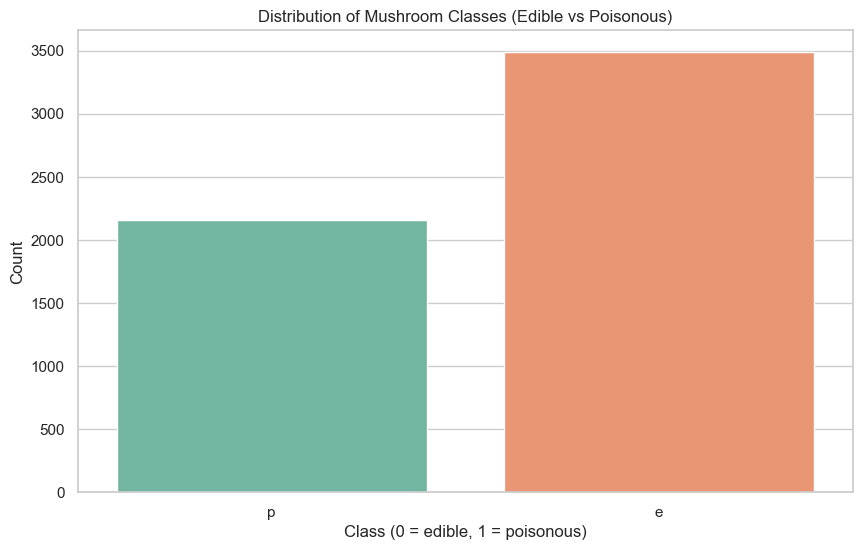

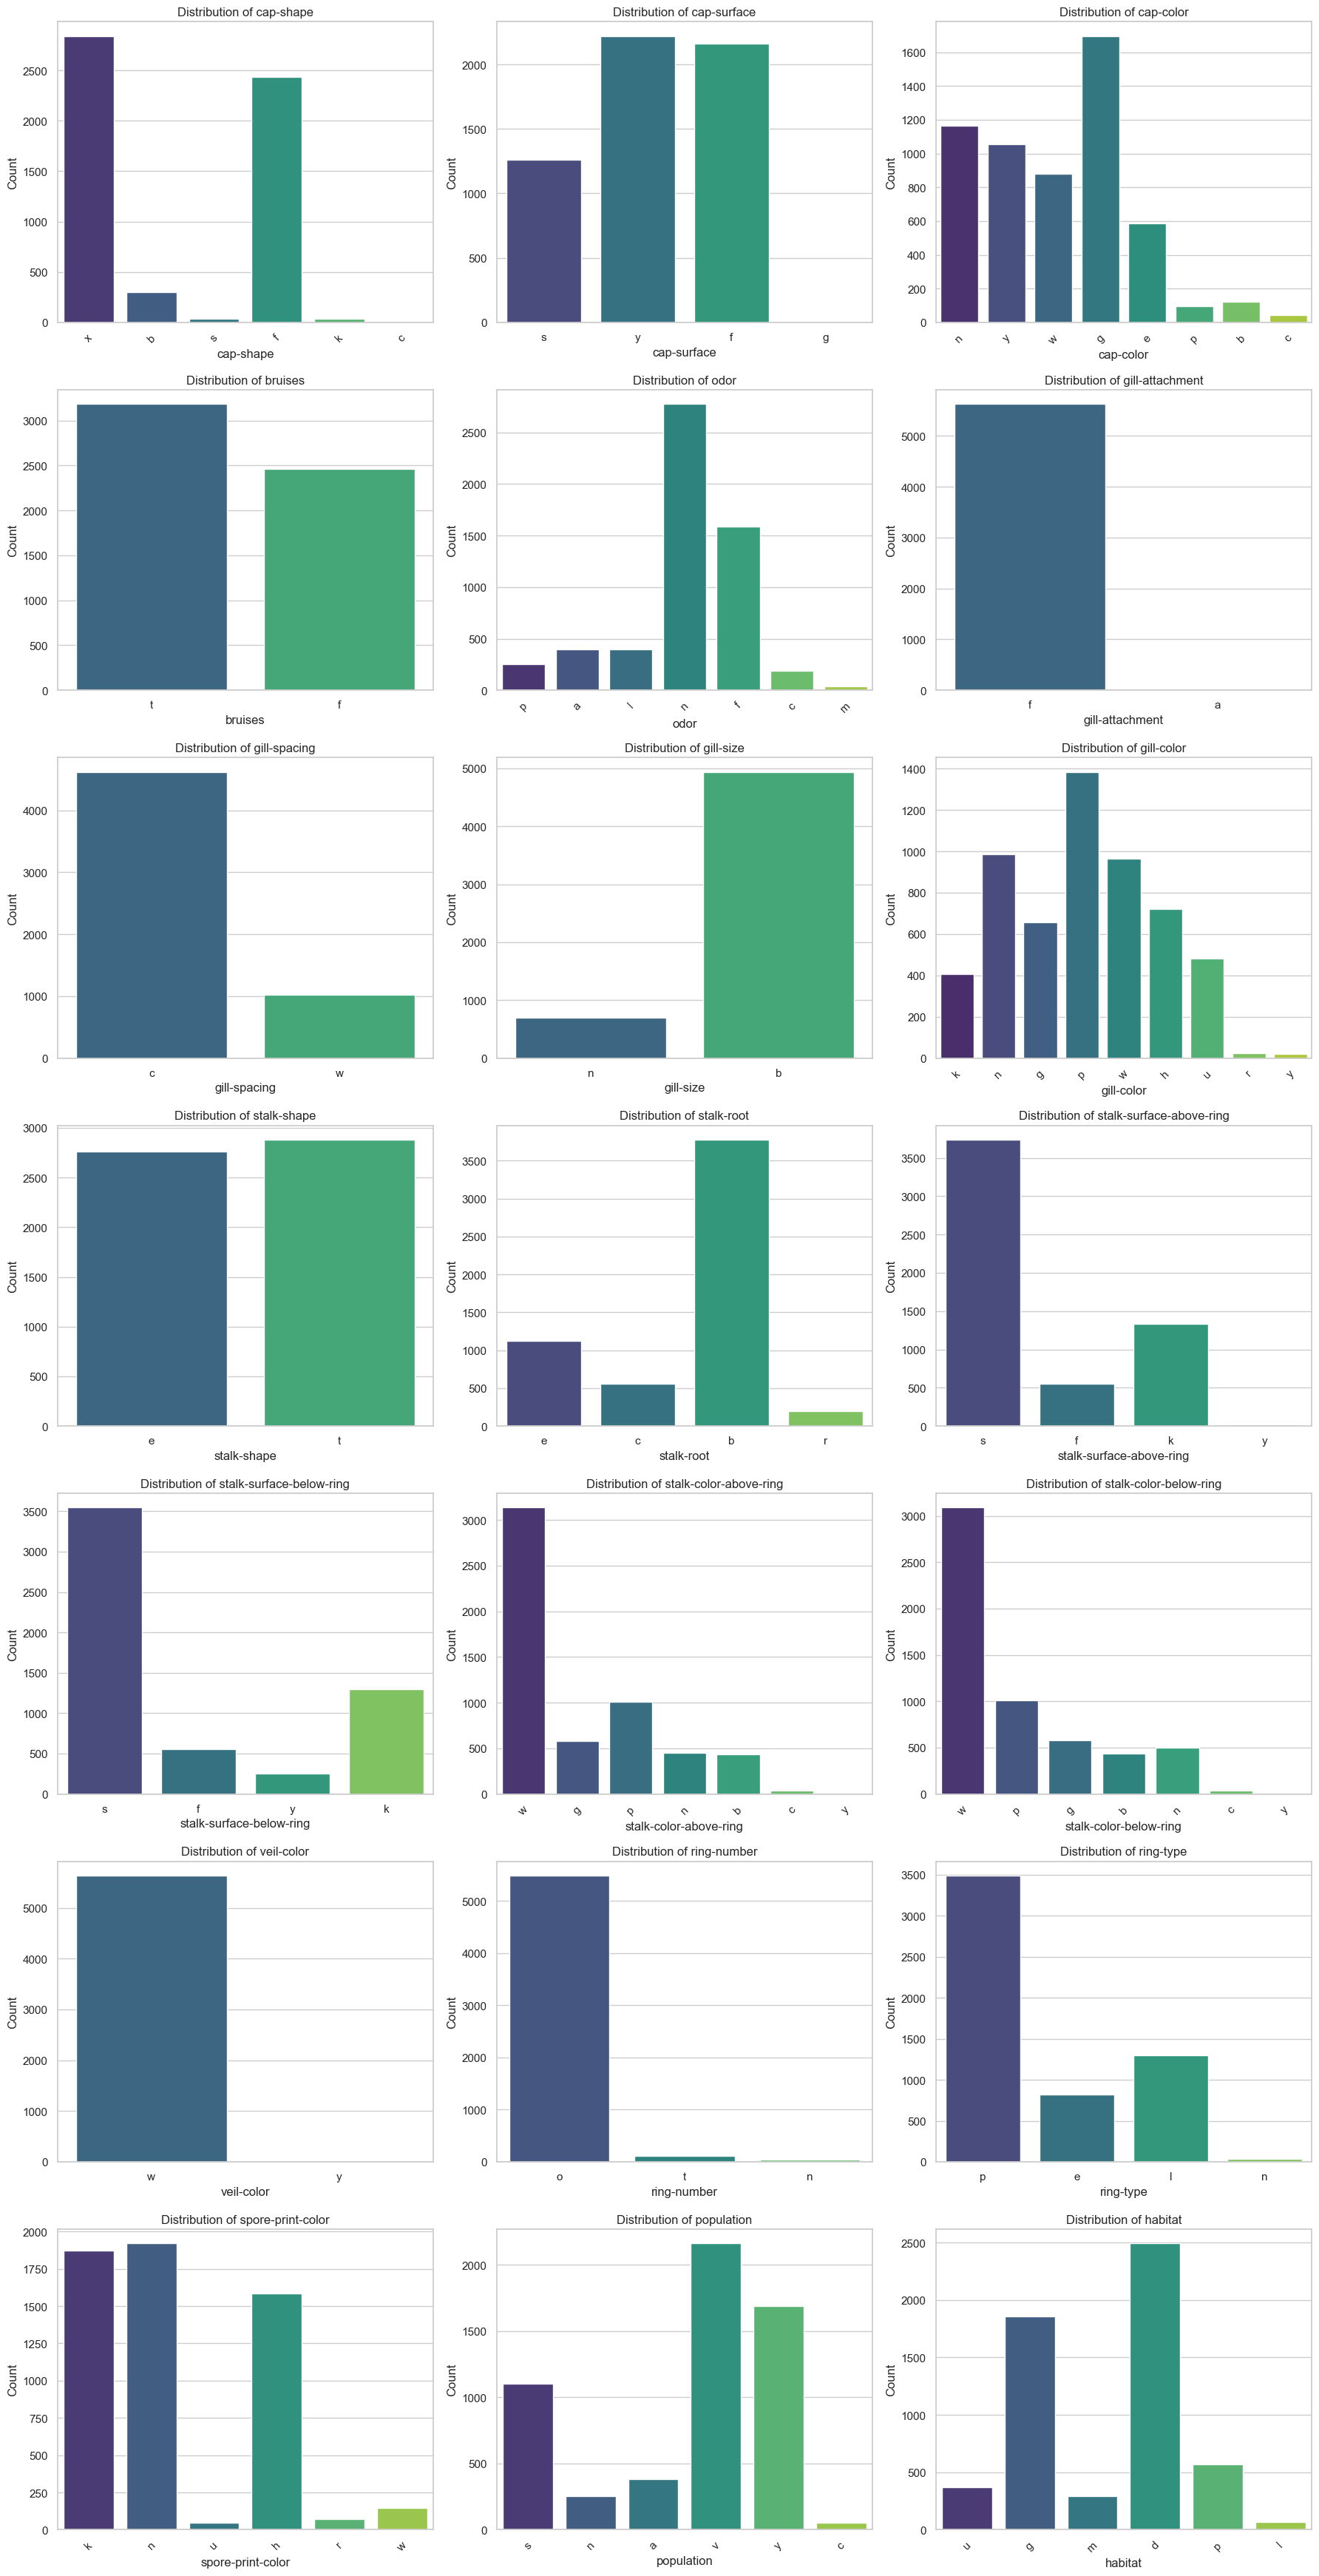

In [121]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

plt.figure(figsize=(10, 6))
sns.countplot(data=mush_df, x='class', hue='class', palette='Set2', legend=False) 
plt.title('Distribution of Mushroom Classes (Edible vs Poisonous)')
plt.xlabel('Class (0 = edible, 1 = poisonous)')
plt.ylabel('Count')
plt.show()

categorical_features = mush_df.columns[1:]  # All columns except the target

n_features = len(categorical_features) # Number of categorical features
n_cols = 3 # Number of columns for the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, feature in enumerate(categorical_features): #enumerate to get both index and value
    # Create countplot with correct syntax
    sns.countplot(data=mush_df, x=feature, hue=feature, ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

    if len(mush_df[feature].unique()) > 5:
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-ticks for better readability

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

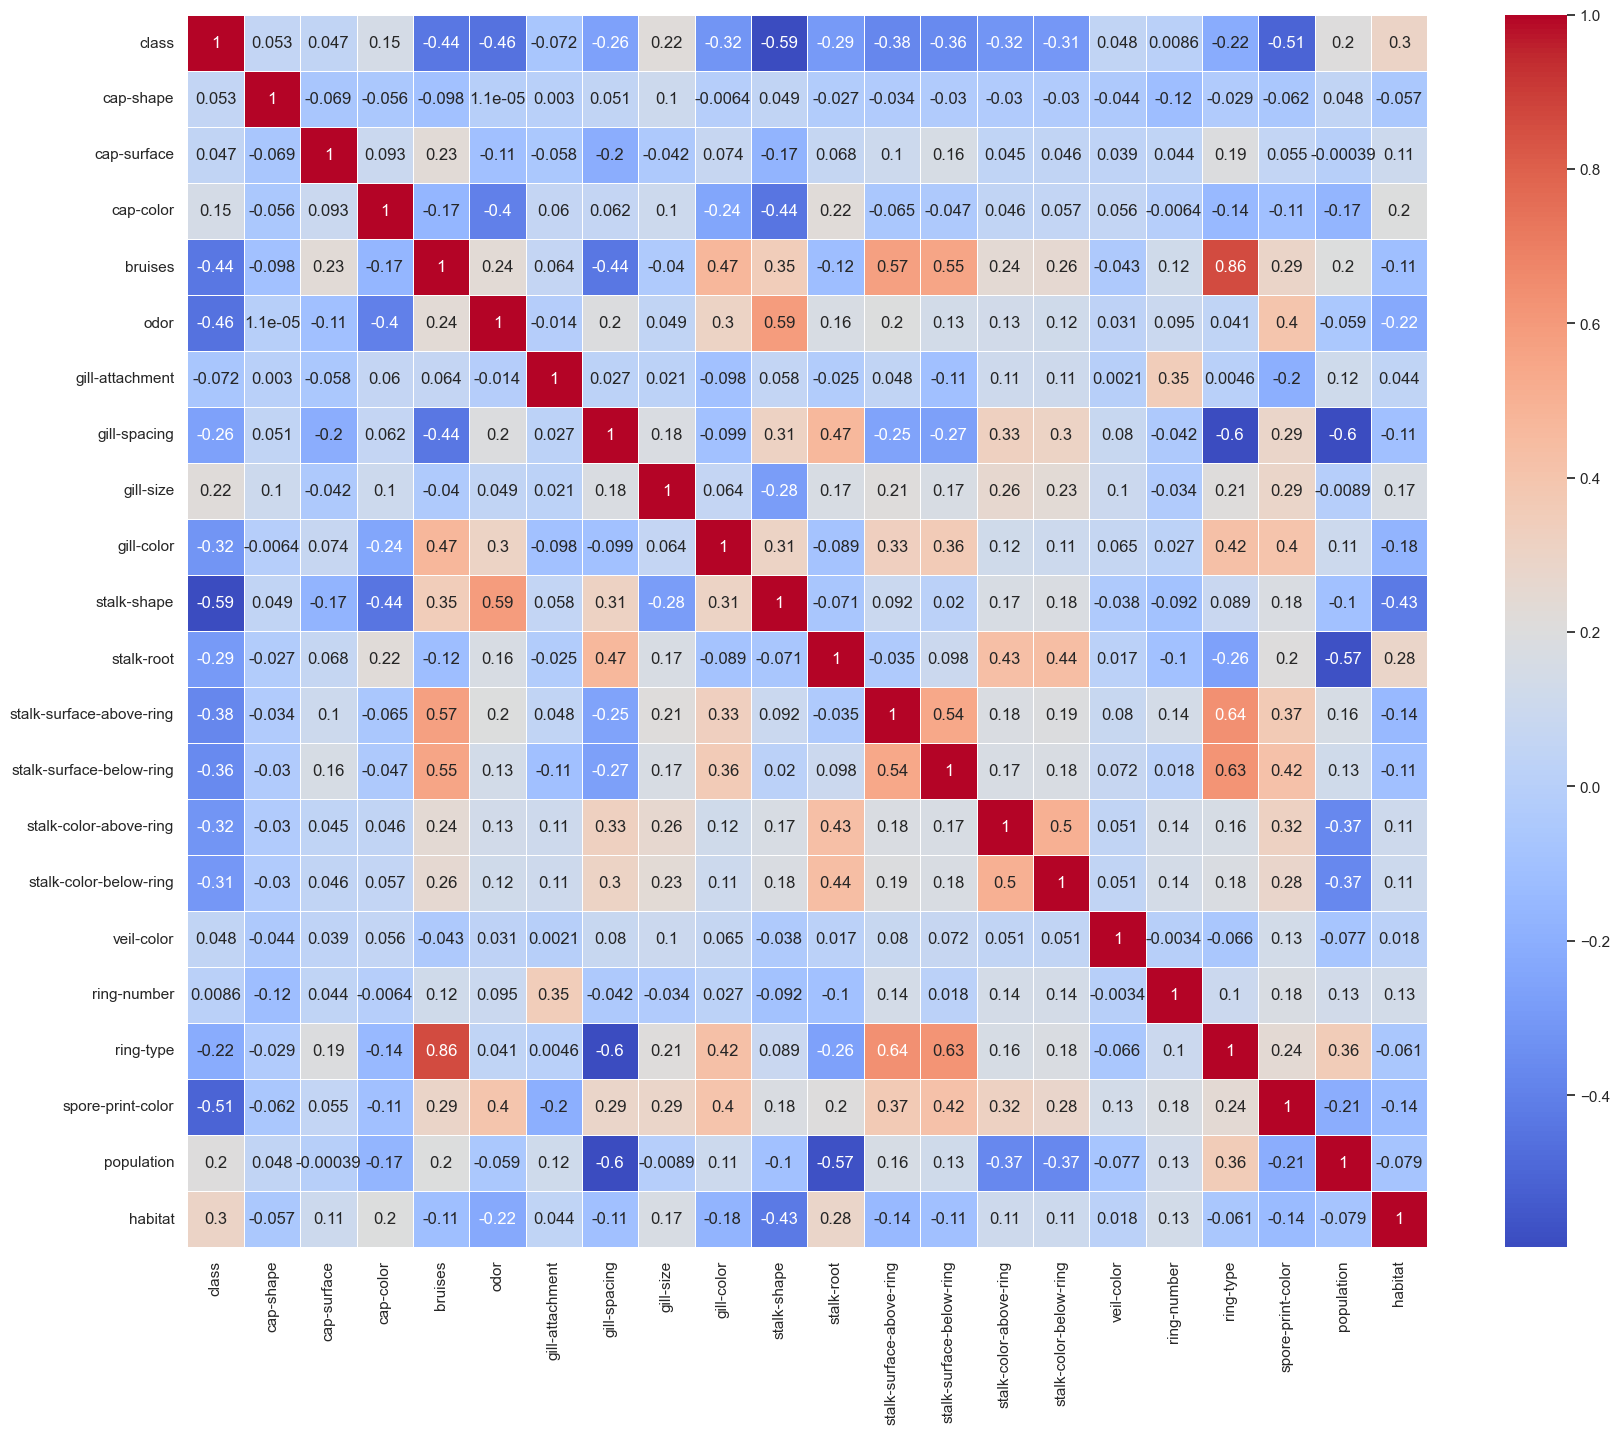

In [122]:
plt.figure(figsize=(20, 16))
sns.heatmap(mush_df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

## A2. Decision Tree Implementation

### a. Implementation Details

In [123]:
# Tree Structure (PART 5)
class TreeNode:
    def __init__(self, depth=0):
        self.depth = depth
        self.is_leaf = False
        self.prediction = None
        self.feature = None
        self.children = {}

class ID3DecisionTreeClassifier: 
# Decision Tree Classifier using ID3 (Greedy) Algorithm invented by Ross Quinlan
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None
        self._feat_gain = Counter()   
        #Counter is a dict subclass for counting objects

    # Entropy Calculation (PART 1)
    def entropy(self, y):
        vals, counts = np.unique(y, return_counts=True) # vals = [0, 1], counts = [x1, x2]
        probs = counts / counts.sum() # probs = [p1 = x1/(x1+x2), p2 = x2/(x1+x2)]    
        return -np.sum(probs * np.log2(probs + 1e-12)) # -Σ p_i * log2(p_i) // 1e-12 to avoid log(0)

    # Information Gain (PART 2)
    def information_gain(self, y, X_col):
        H = self.entropy(y) # Total Entropy
        total = len(y) # Total number of samples
        ig = H # Initialize Information Gain
        for v in np.unique(X_col): # Iterate over unique values
            idx = (X_col == v) # Create Mask for unique values (0 and 1)
            if idx.sum() == 0: # If unique value does not exist
                continue #skip if this sample does not exist
            ig -= (idx.sum()/total) * self.entropy(y[idx]) # Update Information Gain (IG = IG - p_i * H(y_i))
        return ig

    def fit(self, X: pd.DataFrame, y): 
    # This function stores feature names + class labels + applies the model to the data
        self.features_ = list(X.columns) # Store Feature names
        self.classes_ = np.unique(y) # Store unique target classes 
        self.root = self.build_tree(X, np.array(y), depth=0) # Calls recurcsive build tree function
        return self

    def majority(self, y):
        vals, counts = np.unique(y, return_counts=True) # [0,1] and [x1,x2]
        return vals[np.argmax(counts)] # Return class with more counts

    def build_tree(self, X: pd.DataFrame, y: np.ndarray, depth: int):
        node = TreeNode(depth) # Creates new TreeNode object
        
        # Stopping Conditions (PART 4)

        # A) Maximum Depth Condition
        if (self.max_depth is not None) and (depth >= self.max_depth): # if max_depth exists, and depth is bigger than that
            node.is_leaf = True # It is a leaf node
            node.prediction = self.majority(y) #Assign leaf as class with majority counts
            return node

        # B)i) Minimum Samples per Split
        if len(y) < self.min_samples_split or X.shape[1] == 0: 
        # If no. of samples < min samples per split OR no features left to split on
            node.is_leaf = True
            node.prediction = self.majority(y)
            return node
        
        best_feat, best_ig = None, -1    

        # C) Pure Node Condition 
        if len(np.unique(y)) == 1: # (Check if there is only one unique class)
            node.is_leaf = True # If so, it is a leaf node
            node.prediction = y[0] # Assign that unique class as prediction
            return node

        
        # Consider ALL possible splits (QUESTION 3)
        for feat in X.columns: # Passes through each feature
            ig = self.information_gain(y, X[feat].values) # Obtain Information Gain for each feature
            if ig > best_ig: # if current is bigger than best (originally -1)
                best_feat, best_ig = feat, ig # Declare new best feature and IG
        if best_feat is None or best_ig <= 1e-12: # If there is no best feature or Best IG <= 1e-12
            node.is_leaf = True # It is a leaf
            node.prediction = self._majority(y) # Predict it as the class with the majority counts
            return node

        
        node.feature = best_feat # Assign the node's feature as the best feature
        self._feat_gain[best_feat] += float(best_ig)
        for v in X[best_feat].unique(): # loop over each unique value in the best feature
            idx = X[best_feat].values == v # mask for rows where feature = v
            X_sub = X.loc[idx].drop(columns=[best_feat]) # Smaller df without the best feature
            # X.loc[idx]: gives rows that match this branch 
            # .drop(columns=[best_feat]): drops best feature column, so it won't be reused later
            y_sub = y[idx] # Selects labels corresponding to rows in X_sub

            # B)ii) Minimum Samples per Leaf
            if len(y_sub) < self.min_samples_leaf: # If no. of samples in this branch < min samples per leaf
                child = TreeNode(depth=depth+1) # create new leaf, one level deeper
                child.is_leaf = True # it is a leaf
                child.prediction = self._majority(y) # predict as class with majority counts 
                node.children[v] = child # insert in node's children dict, indexed by v
            else:
                node.children[v] = self.build_tree(X_sub, y_sub, depth+1) # build a sub-tree instead of a leaf

        return node

    def predict_one(self, x: dict):
        node = self.root # start at the root 
        while not node.is_leaf: # while node is not leaf
            feat = node.feature # read feature name that we split on 
            val = x.get(feat, None) # Read value for that feature, if none, val = None (to avoid error message)
            if val in node.children: # if the value is in the node's children dict
                node = node.children[val] # Move down to child node, and repeat the while loop 
            else: # if value is not seen before during training 
                leaves = [] # list to store leaves for majority 
                def collect(n):
                    if n.is_leaf: # if node is leaf
                        leaves.append(n.prediction) # append to list 
                    else:
                        for ch in n.children.values(): # Iterate over each child
                            collect(ch) # Repeat process
                collect(node)
                if len(leaves)==0: # if no leaves were found 
                    return self.classes_[0] # return first class
                vals, counts = np.unique(leaves, return_counts=True) 
                return vals[np.argmax(counts)]
        return node.prediction

    def predict(self, X: pd.DataFrame):
        return np.array([self.predict_one(r) for r in X.to_dict(orient='records')])
        # convert each r into dict and return them into array

    def feature_importances(self):
        return dict(self.feat_gain) 
        # .feat_gain is internal counter that sums IG for each feature
        # converts it into dict {"feature1": IG1, "feature2": IG2, ...}

### Train model and predict

In [124]:
clf = ID3DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)


## BONUS PART: Robust Post‑Pruning & Tree Visualization


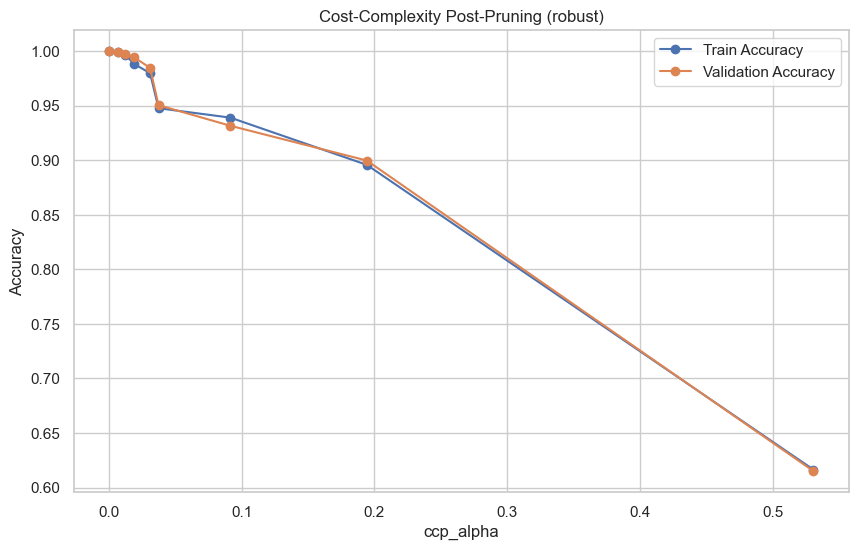

Best alpha for pruning: 0.0
Train accuracy: 1.0
Validation accuracy: 1.0


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [125]:
# Helper to fetch whichever variable name you already used
def pick(*names):
# The * means names will be a tuple of any number of arguments given to the function.
    g = globals() # makes a dictionary of all global variables
    for n in names:
        if n in g:
            return g[n]
    raise NameError(f"None of the variables {names} were found in the notebook environment.")

# Get train/validation data (falls back to test if no validation set)
X_train = pick('X_train','X_tr','X_train_enc','X_train_encoded')
y_train = pick('y_train','Y_train','y_tr','y_train_enc','y_train_encoded')

X_val = pick('X_val','X_valid','X_validation','X_dev','X_devset','X_test','X_te')
y_val = pick('y_val','Y_val','y_valid','y_validation','y_dev','y_devset','y_test','Y_test','y_te')

# Try to mirror your previous tree's settings if it exists; otherwise default to entropy (information gain)
criterion = 'entropy'
max_depth = None
random_state = 42

if 'clf' in globals(): # if clf variable exists (clf is previously trained classifier)
    try:
        p = clf.get_params()
        criterion = p.get('criterion', criterion)
        max_depth = p.get('max_depth', max_depth)
        random_state = p.get('random_state', random_state)
    except Exception:
        pass

# A temporary tree to get the effective alphas for pruning
tmp = DecisionTreeClassifier(criterion=criterion, random_state=random_state, max_depth=None)
path = tmp.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train/evaluate a tree for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(criterion=criterion,
                                random_state=random_state,
                                max_depth=max_depth,
                                ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    clfs.append(dt)

train_scores = [accuracy_score(y_train, m.predict(X_train)) for m in clfs]
val_scores   = [accuracy_score(y_val,   m.predict(X_val))   for m in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, val_scores,   marker='o', label='Validation Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Cost-Complexity Post-Pruning (robust)")
plt.legend()
plt.grid(True)
plt.show()
# Choose best alpha and fit the pruned tree
best_idx = int(np.argmax(val_scores))
best_alpha = float(ccp_alphas[best_idx])
print(f"Best alpha for pruning: {best_alpha}")
print(f"Train accuracy: {train_scores[best_idx]}")
print(f"Validation accuracy: {val_scores[best_idx]}")

#Best model using Alpha calculated above
pruned_clf = DecisionTreeClassifier(criterion=criterion,
                                    random_state=random_state,
                                    max_depth=max_depth,
                                    ccp_alpha=best_alpha)
pruned_clf.fit(X_train, y_train)



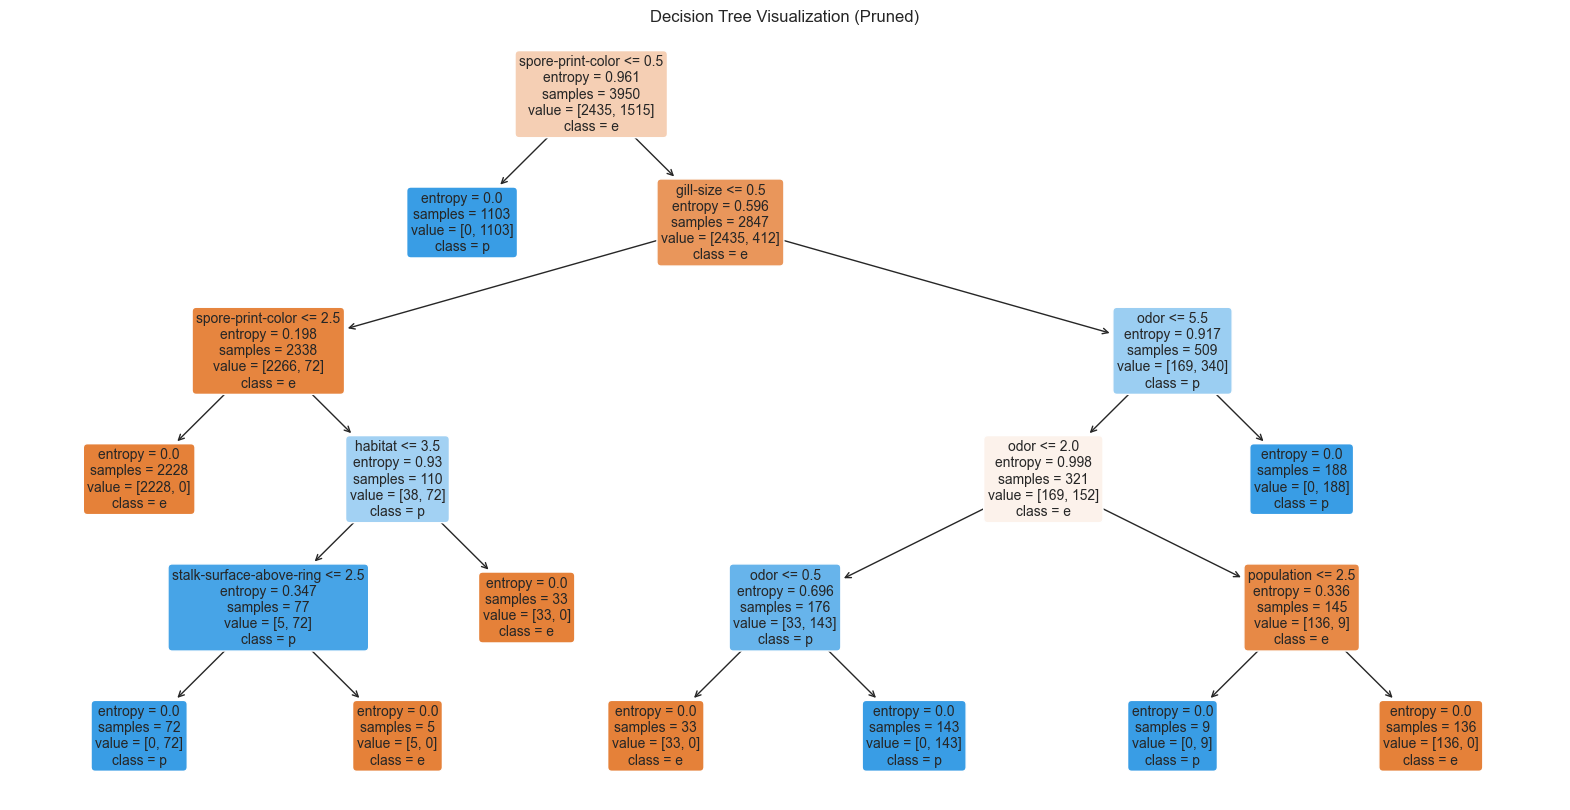

In [126]:
# This block decides what to call the features when plotting the tree
if 'feature_names' in globals():
    feat_names = feat_names
else:
    try:
        # If X_train is a DataFrame, use its columns
        feat_names = list(X_uncoded.columns.astype(str))
    except Exception:
        feat_names = [f"X{i}" for i in range(getattr(X_uncoded, 'shape', [0, 0])[1])]

# Class names
if 'class_labels' in globals():
    class_names = [str(c) for c in class_labels]
else:
    try:
        class_names = [str(c) for c in np.unique(Y_uncoded)]
    except Exception:
        class_names = None  # sklearn will handle None

plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_clf,
               filled=True,
               feature_names=feat_names,
               class_names=class_names,
               rounded=True,
               fontsize=10)
plt.title("Decision Tree Visualization (Pruned)")
plt.show()



## Part A3: Analysis and Evaluation

This section includes:
- Hyperparameter tuning (max_depth variations)
- Performance metrics (Accuracy, Precision, Recall, F1-score)
- Confusion Matrix analysis
- Feature importance ranking by information gain
- Tree complexity vs performance analysis
- Overfitting analysis (training vs validation)


Validation Accuracy for different max_depth values:
max_depth=3: Accuracy=0.9646
max_depth=5: Accuracy=1.0000
max_depth=7: Accuracy=1.0000
max_depth=10: Accuracy=1.0000
max_depth=None: Accuracy=1.0000

Pruned Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


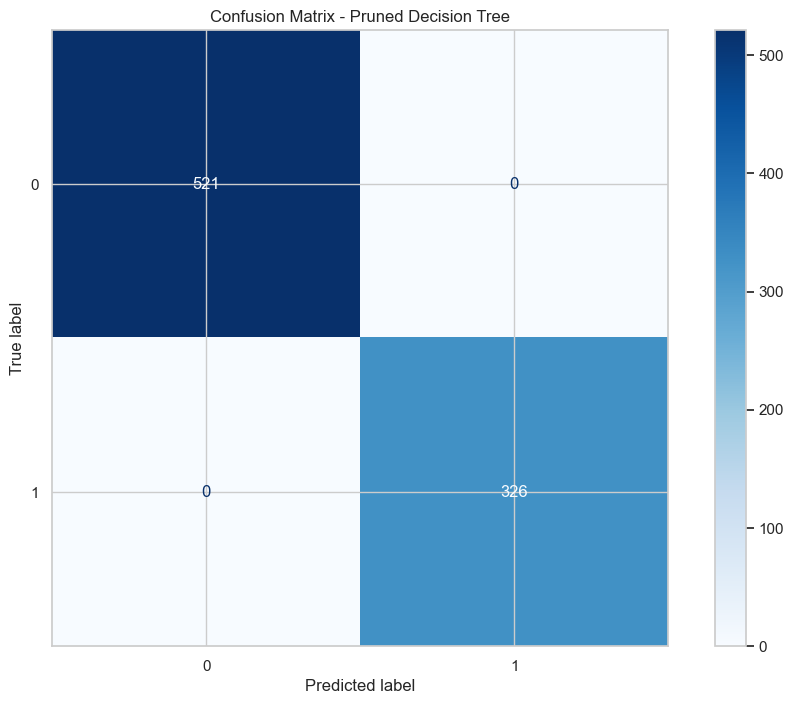


Top 10 Features by Information Gain:
18: spore-print-color - 0.6477
7: gill-size - 0.2023
4: odor - 0.1102
20: habitat - 0.0199
19: population - 0.0128
11: stalk-surface-above-ring - 0.0070
8: gill-color - 0.0000
1: cap-surface - 0.0000
2: cap-color - 0.0000
3: bruises - 0.0000


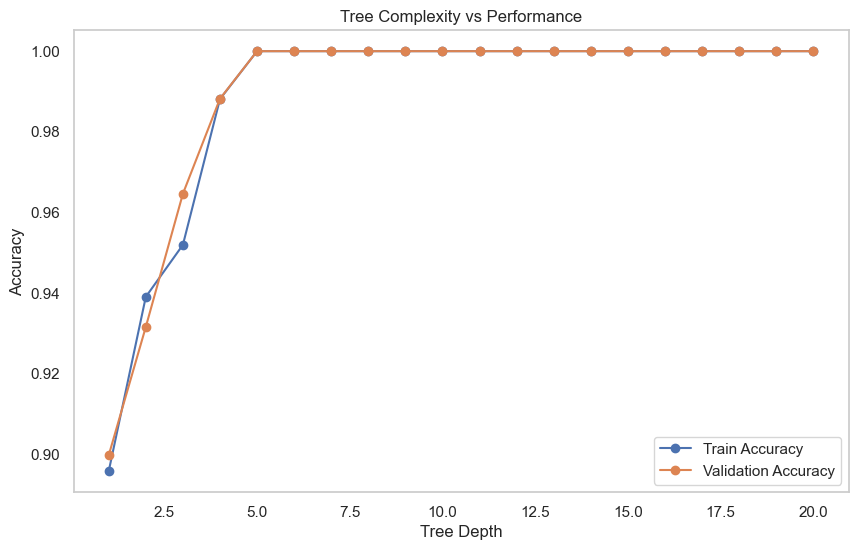

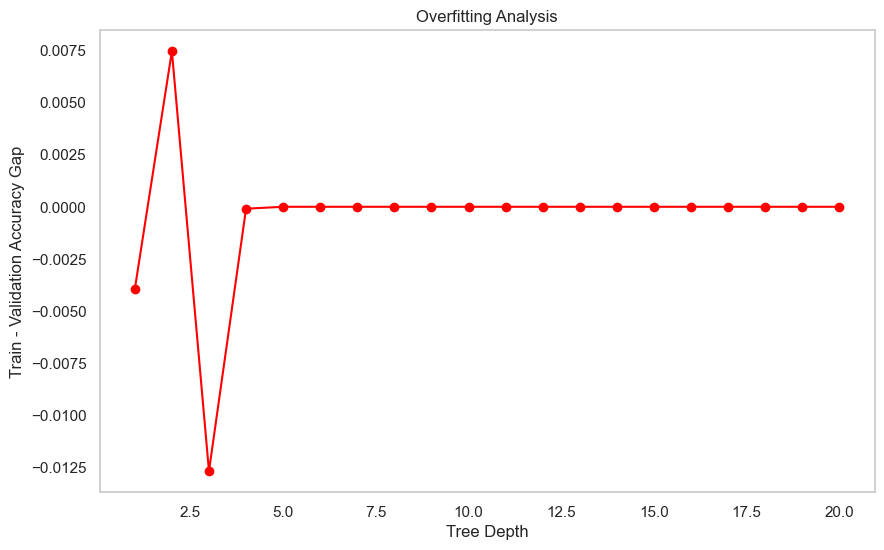

In [131]:
# 1. Hyperparameter tuning for max_depth
max_depth_values = [3, 5, 7, 10, None]
results = []

for d in max_depth_values:
    model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=d)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred_val)
    results.append((d, acc))

print("Validation Accuracy for different max_depth values:")
for d, acc in results:
    print(f"max_depth={d}: Accuracy={acc:.4f}")

# 2. Performance metrics for the pruned model
y_pred = pruned_clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"\nPruned Model Performance:\nAccuracy: {acc:.4f}\nPrecision: {prec:.4f}\nRecall: {rec:.4f}\nF1-score: {f1:.4f}")

# 3. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pruned_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Pruned Decision Tree")
plt.show()

# 4. Feature Importance ranking by Information Gain
importances = pruned_clf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

# Try to get feature names; fallback if not available
try:
    feature_list = feature_names
except NameError: # if feature_names is not defined
    try:
        # If X_train is a DataFrame
        feature_list = list(X_uncoded.columns)
    except Exception:
        feature_list = [f"X{i}" for i in range(len(importances))]

print("\nTop 10 Features by Information Gain:")
for i in sorted_idx[:10]:
    print(f"{i}: {feature_list[i]} - {importances[i]:.4f}")

# 5. Tree Complexity vs Performance
train_accs = []
val_accs = []
depths = list(range(1, 21))

for d in depths:
    temp_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=d)
    temp_tree.fit(X_train, y_train)
    train_accs.append(accuracy_score(y_train, temp_tree.predict(X_train)))
    val_accs.append(accuracy_score(y_val, temp_tree.predict(X_val)))

plt.figure(figsize=(10,6))
plt.plot(depths, train_accs, label="Train Accuracy", marker='o')
plt.plot(depths, val_accs, label="Validation Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Tree Complexity vs Performance")
plt.legend()
plt.grid()
plt.show()

# 6. Overfitting Analysis
overfitting_gap = [train - val for train, val in zip(train_accs, val_accs)]
plt.figure(figsize=(10,6))
plt.plot(depths, overfitting_gap, marker='o', color='red')
plt.xlabel("Tree Depth")
plt.ylabel("Train - Validation Accuracy Gap")
plt.title("Overfitting Analysis")
plt.grid()
plt.show()


